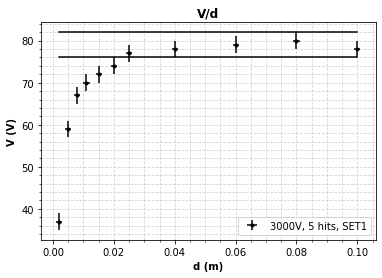

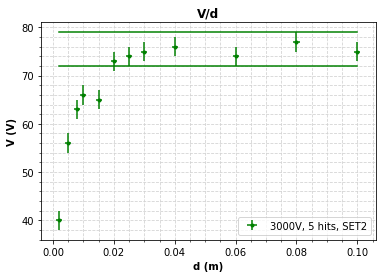

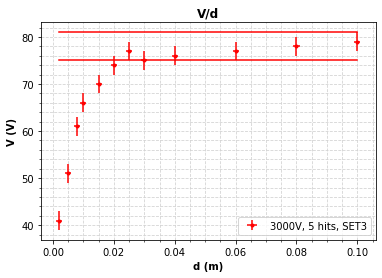

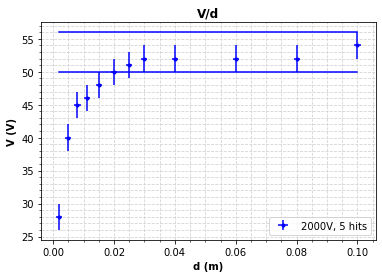

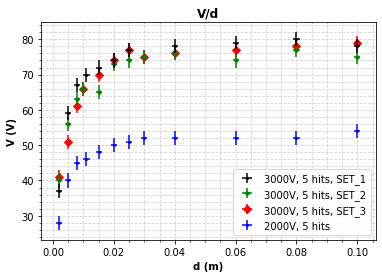

Q1
2.133e-08
8.1e-10
Q2
2.0385e-08
9.45e-10
Q3
2.106e-08
8.1e-10
Q4
1.431e-08
8.1e-10
Q4*3/2
2.1465e-08
1.215e-09


In [54]:
#1.6cm è quando si inizia a perdere l'approssimazione di faccie piane e parallele
#d = 0.015 << 0.158 = sqrt(A)

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

eps0 = 8.859E-12
DBacchetta = 3.20

d2 = np.array([0.002,0.005,0.008,0.01,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V2 = np.array([40,56,63,66,65,73,74,75,76,74,77,75])
Verr2 = 2

d3 = np.array([0.002,0.005,0.008,0.01,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V3 = np.array([41,51,61,66,70,74,77,75,76,77,78,79])

d4 = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V4 = np.array([28,40,45,46,48,50,51,52,52,52,52,54])


d = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.04,0.06,0.08,0.1])
derr = 0.001

Dc = 0.178
Dcerr = 0.0001
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001

Ce = 27e-11

b = eps0*A
berr = b*A_err/A

Verr = 2
V = np.array([37,59,67,70,72,74,77,78,79,80,78])

Qvalues = (b/d+Ce)*V
Qvalues2 = (b/d2+Ce)*V2
Qvalues3 = (b/d3+Ce)*V3
Qvalues4 = (b/d4+Ce)*V4


#GRAFICO1 V/d 


fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, markersize=3,yerr=Verr, fmt='o', color="black", label="3000V, 5 hits, SET1")

x = np.linspace(min(d),max(d),1000)
ymax = np.ones(1000)*82
ymin = np.ones(1000)*76

Q1 = 79*Ce
Q1_err = 3*Ce

plt.plot(x,ymax,  color="black")
plt.plot(x,ymin,  color="black")


plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO2 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d2, V2, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="green", label="3000V, 5 hits, SET2")

x = np.linspace(min(d2),max(d2),1000)
ymax = np.ones(1000)*79
ymin = np.ones(1000)*72

Q2 = 75.5*Ce
Q2_err = 3.5*Ce

plt.plot(x,ymax,color="green")
plt.plot(x,ymin,  color="green")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO3 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d3, V3, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="red", label="3000V, 5 hits, SET3")

x = np.linspace(min(d3),max(d3),1000)
ymax = np.ones(1000)*81
ymin = np.ones(1000)*75

Q3 = 78*Ce
Q3_err = 3*Ce

plt.plot(x,ymax,  color="red")
plt.plot(x,ymin, color="red")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO4 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d4, V4, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="blue", label="2000V, 5 hits")

x = np.linspace(min(d4),max(d4),1000)
ymax = np.ones(1000)*56
ymin = np.ones(1000)*50

Q4 = 53*Ce
Q4_err = 3*Ce

plt.plot(x,ymax,  color="blue")
plt.plot(x,ymin,  color="blue")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICI V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, markersize=2,yerr=Verr, fmt='o', color="black", label="3000V, 5 hits, SET_1",zorder=10)
plt.errorbar(d2, V2, xerr=derr, markersize=3,yerr=Verr2, fmt='D', color="green", label="3000V, 5 hits, SET_2",zorder=9)
plt.errorbar(d3, V3, xerr=derr, markersize=6,yerr=Verr2, fmt='D', color="red", label="3000V, 5 hits, SET_3")
plt.errorbar(d4, V4, xerr=derr, markersize=2,yerr=Verr2, fmt='o', color="blue", label="2000V, 5 hits")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()


print("Q1")
print(Q1)
print(Q1_err)
print("Q2")
print(Q2)
print(Q2_err)
print("Q3")
print(Q3)
print(Q3_err)
print("Q4")
print(Q4)
print(Q4_err)
print("Q4*3/2")
print(Q4*3/2)
print(Q4_err*3/2)



# New Section